# Classification Project

## Goals
    - Discover drivers of churn in telco customer data.
    - Use drivers to develop a machine learning model to classify customers that end up churning or not churning.

## Imports

In [63]:
# custom modules for data prep:
import acquire as a
import prepare as p

# tabular manipulation:
import numpy as np
import pandas as pd

# ML imports:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier, \
export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# imports Random Forest model from sklearn:
from sklearn.ensemble import RandomForestClassifier

# visualization:
import matplotlib.pyplot as plt
import seaborn as sns

# stats:
from scipy import stats

## Acquire

In [2]:
# Uses the function defined in acquire.py to load the Telco data.
df = a.get_telco_data()
df

this file exists, reading from csv


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


## Prepare

In [3]:
# Drops any unnecessary, unhelpful, or duplicated columns.
df = df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id'])

In [4]:
# gives back the dimentionality of the df.
df.shape

(7043, 21)

In [5]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [6]:
df.describe()

,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  monthly_c

In [8]:
df.contract_type.value_counts()

contract_type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [9]:
df.internet_service_type.value_counts()

internet_service_type
Fiber optic    3096
DSL            2421
Name: count, dtype: int64

In [10]:
df.payment_type.value_counts()

payment_type
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [11]:
df.monthly_charges.value_counts()

monthly_charges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
116.55     1
106.85     1
68.55      1
108.80     1
67.85      1
Name: count, Length: 1585, dtype: int64

In [12]:
# handle null values
df.isnull().sum()

customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type    1526
payment_type                0
dtype: int64

In [13]:
# handles the null values in internet service type by filling the null values with none.
df['internet_service_type'] = df['internet_service_type'].fillna('None') 

In [14]:
# shows the counts of all values in the internet service type column.
df.internet_service_type.value_counts()

internet_service_type
Fiber optic    3096
DSL            2421
None           1526
Name: count, dtype: int64

In [15]:
# replaces values in the total charges column with a blank space to 0.0
df.total_charges = df.total_charges.str.replace(' ','0.0')

In [16]:
# changes total_charges to a float instead of an object
df['total_charges'] = (df.total_charges + '0').astype(float)

In [17]:
# verifies that there are no longer any null values.
df.isnull().sum()

customer_id              0
gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
contract_type            0
internet_service_type    0
payment_type             0
dtype: int64

In [18]:
# sets the index using customer_id
df = df.set_index(['customer_id'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64

In [20]:
df.select_dtypes(include='O').columns

Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn',
       'contract_type', 'internet_service_type', 'payment_type'],
      dtype='object')

In [21]:
df.churn.mode()

0    No
Name: churn, dtype: object

In [22]:
# splits df into three df's train, validate, and test
train, validate, test = p.splitting_data(df, 'churn')

In [23]:
# function encodes each df's categorical columns
train_encoded, validate_encoded, test_encoded = p.telco_encoded(train, validate, test)

In [24]:
# checks the shape of all the new df's
train_encoded.shape, validate_encoded.shape, test_encoded.shape

((4225, 31), (1409, 31), (1409, 31))

In [25]:
train_encoded.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,1,38,95.00,3591.25,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
5804-LEPIM,1,2,70.35,139.05,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
4895-TMWIR,1,11,19.95,214.75,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1342-JPNKI,0,10,86.05,834.10,1,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0,0
3397-AVTKU,0,43,60.00,2548.55,1,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0


In [26]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 4083-BFNYK to 7562-UXTPG
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         4225 non-null   int64  
 1   tenure                                 4225 non-null   int64  
 2   monthly_charges                        4225 non-null   float64
 3   total_charges                          4225 non-null   float64
 4   gender_Male                            4225 non-null   int64  
 5   partner_Yes                            4225 non-null   int64  
 6   dependents_Yes                         4225 non-null   int64  
 7   phone_service_Yes                      4225 non-null   int64  
 8   multiple_lines_No phone service        4225 non-null   int64  
 9   multiple_lines_Yes                     4225 non-null   int64  
 10  online_security_No internet service    4225 non-null   int64  

## Explore

#### Hypothesize

Q: Does having paperless billing affect whether or not someone churned?

In [27]:
train_encoded.churn_Yes.value_counts()

churn_Yes
0    3104
1    1121
Name: count, dtype: int64

In [28]:
train_encoded.paperless_billing_Yes.value_counts()

paperless_billing_Yes
1    2507
0    1718
Name: count, dtype: int64

#### Visualize

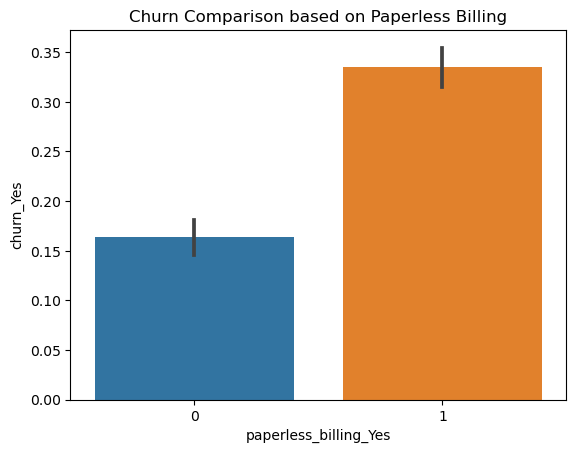

In [29]:
#creates barplot
ax = sns.barplot(data=train_encoded, y='churn_Yes', x='paperless_billing_Yes')

# Adding a title
ax.set(title='Churn Comparison based on Paperless Billing')

# Show the plot
plt.show()

We can see that people with paperless billing have a higher rate of churn (almost double).

#### Analyze (with statistics)

$H_0$: There is NO relationship between paperless billing and churn.

$H_a$: There IS relationship between paperless billing and churn.

α = 0.05

In [30]:
# creates a crosstabulation of the two columns
observed = pd.crosstab(train_encoded.churn_Yes, train_encoded.paperless_billing_Yes)
observed

paperless_billing_Yes,0,1
churn_Yes,,
0,1437,1667
1,281,840


In [31]:
#chi2 returns 4 variables
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [32]:
p

3.952227763871639e-35

My p-value is less than alpha, therefore, we reject the null hypothesis.

We can conclude that there is a relationship between paperless billing and churn.

#### Summarize

- Write the takeaway from your question, plot, and stats test

We confirmed there is a relationship between paperless billing and churn, and that people with paperless billing, are more likely to churn.

#### Hypothesize

Q2: Does being male affect whether or not someone churned?

In [33]:
train_encoded.churn_Yes.value_counts()

churn_Yes
0    3104
1    1121
Name: count, dtype: int64

In [34]:
train_encoded.gender_Male.value_counts()

gender_Male
1    2116
0    2109
Name: count, dtype: int64

#### Visualize

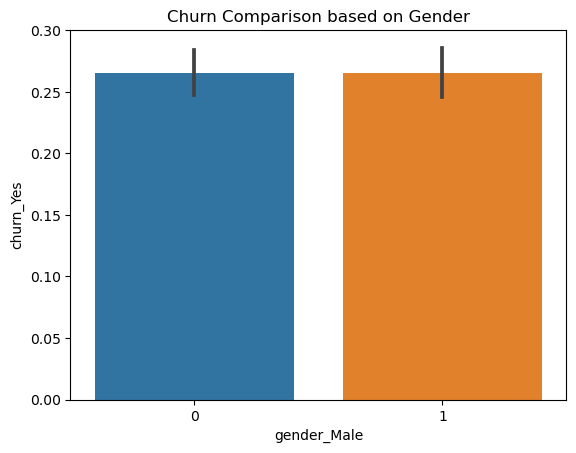

In [35]:
#creates barplot
bx = sns.barplot(data=train_encoded, y='churn_Yes', x='gender_Male')

# Adding a title
bx.set(title='Churn Comparison based on Gender')

# Show the plot
plt.show()

We can see that males do not have significantly higher rates of churn.

#### Analyze (with statistics)

𝐻0
: There is NO relationship between male gender and churn.

𝐻𝑎
: There IS relationship between male gender and churn.

α = 0.05

In [36]:
observed = pd.crosstab(train_encoded.churn_Yes, train_encoded.gender_Male)
observed

gender_Male,0,1
churn_Yes,,
0,1550,1554
1,559,562


In [37]:
#chi2 returns 4 variables
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [38]:
p

0.996031931504371

My p-value is greater than alpha, therefore, we fail to reject the null hypothesis.

We can conclude that there is NO relationship between male gender and churn.

#### Summarize

- Write the takeaway from your question, plot, and stats test

We confirmed there is NO relationship between male gender and churn, and that people that are male gender, are not more likely to churn.

#### Hypothesize

Q3: Does having dependents affect whether or not someone churned?

In [39]:
train_encoded.dependents_Yes.value_counts()

dependents_Yes
0    2961
1    1264
Name: count, dtype: int64

#### Visualize

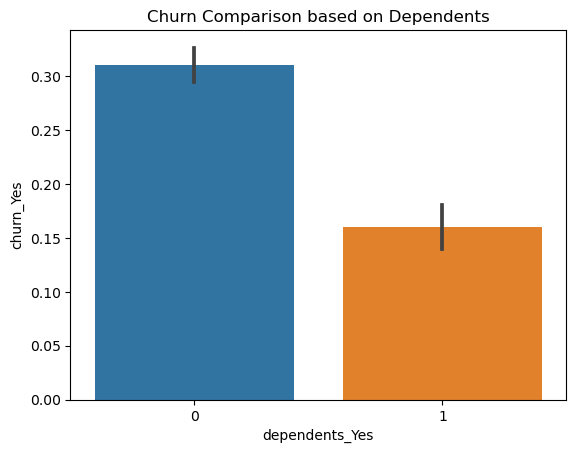

In [40]:
#creates barplot
cx = sns.barplot(data=train_encoded, y='churn_Yes', x='dependents_Yes')

# Adding a title
cx.set(title='Churn Comparison based on Dependents')

# Show the plot
plt.show()

We can see that people with dependents have a lower rate of churn (almost half).

#### Analyze (with statistics)

𝐻0 : There is NO relationship between dependents and churn.

𝐻𝑎 : There IS relationship between dependents and churn.

α = 0.05

In [41]:
observed = pd.crosstab(train_encoded.churn_Yes, train_encoded.dependents_Yes)
observed

dependents_Yes,0,1
churn_Yes,,
0,2042,1062
1,919,202


In [42]:
#chi2 returns 4 variables
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [43]:
p

4.91325418673439e-24

My p-value is less than alpha, therefore, we reject the null hypothesis.

We can conclude that there is a relationship between dependents and churn.

#### Summarize

We confirmed there is a relationship between dependents and churn, and that people with dependents, are more likely to churn.

#### Hypothesize

Q: Does being a senior citizen affect whether or not someone churned?

In [85]:
train_encoded.senior_citizen.value_counts()

senior_citizen
0    3531
1     694
Name: count, dtype: int64

#### Visualize

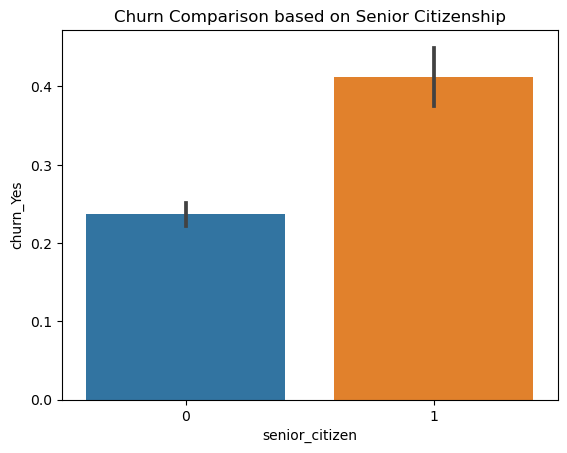

In [86]:
#creates barplot
dx = sns.barplot(data=train_encoded, y='churn_Yes', x='senior_citizen')

# Adding a title
dx.set(title='Churn Comparison based on Senior Citizenship')

# Show the plot
plt.show()

We can see that people who are senior citizens have a higher rate of churn.

#### Analyze (with statistics)

𝐻0 : There is NO relationship between senior citizenship and churn.

𝐻𝑎 : There IS relationship between senior citizenship and churn.

α = 0.05

In [87]:
observed = pd.crosstab(train_encoded.churn_Yes, train_encoded.senior_citizen)
observed

senior_citizen,0,1
churn_Yes,,
0,2696,408
1,835,286


In [88]:
#chi2 returns 4 variables
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [89]:
p

1.5271938515844278e-21

My p-value is less than alpha, therefore, we reject the null hypothesis.

We can conclude that there is a relationship between senior citizenship and churn.

#### Summarize

We confirmed there is a relationship between senior citizenship and churn, and that people with senior citizenship, are more likely to churn.

## Model

In [90]:
# obtain a baseline accuracy
df.churn.mode()

0    No
Name: churn, dtype: object

In [92]:
# calculates baseline accuracy
(df.churn == 'No').mean()

0.7346301292063041

In [49]:
# determine features
X_train = train_encoded.drop(columns='churn_Yes')
X_validate = validate_encoded.drop(columns='churn_Yes')
X_test = test_encoded.drop(columns='churn_Yes')

In [50]:
# determines target variable
y_train = train_encoded.churn_Yes
y_validate = validate_encoded.churn_Yes
y_test = test_encoded.churn_Yes

In [103]:
# DECISION TREE
# creates a for loop iterating 20 times with a different max depth each iteration.
for x in range(1,21):
    #create the decision tree object
    tree = DecisionTreeClassifier(max_depth=x)
    
    #fit the object only on TRAIN DATA!
    tree.fit(X_train, y_train)
    
    #calculate the accuracy for train and validate
    acc = tree.score(X_train, y_train)
    acc_v = tree.score(X_validate, y_validate)
    
    print(f'max depth of {x}, the accuracy train = {round(acc,4)}, val = {round(acc_v,4)}')

max depth of 1, the accuracy train = 0.7359, val = 0.7253
max depth of 2, the accuracy train = 0.7837, val = 0.7878
max depth of 3, the accuracy train = 0.7837, val = 0.7878
max depth of 4, the accuracy train = 0.7922, val = 0.7779
max depth of 5, the accuracy train = 0.8019, val = 0.7885
max depth of 6, the accuracy train = 0.8097, val = 0.7864
max depth of 7, the accuracy train = 0.8225, val = 0.7899
max depth of 8, the accuracy train = 0.8364, val = 0.7764
max depth of 9, the accuracy train = 0.8537, val = 0.7693
max depth of 10, the accuracy train = 0.8776, val = 0.7615
max depth of 11, the accuracy train = 0.8963, val = 0.7594
max depth of 12, the accuracy train = 0.9174, val = 0.7644
max depth of 13, the accuracy train = 0.9328, val = 0.7424
max depth of 14, the accuracy train = 0.9422, val = 0.7516
max depth of 15, the accuracy train = 0.956, val = 0.7402
max depth of 16, the accuracy train = 0.9652, val = 0.7374
max depth of 17, the accuracy train = 0.969, val = 0.7331
max dept

We can now choose the best model, that does not overfit the data. In this case I would choose a max depth of 3 because the train and validate accuracies are the closest together there and they both have a greater accuracy than the baseline.

### Random Forest

In [53]:
# initializes an empty list named stats. Creates a for-loop that iterates 10 times each time changing max depth and min leaf samples. Then appends to the list and prints out results.
stats = []

for x in range(1,11):
    rf = RandomForestClassifier(min_samples_leaf=x, max_depth=11-x, random_state=123)

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_train)

    acc = rf.score(X_train, y_train)
    acc_val = rf.score(X_validate, y_validate)
    
    stats.append([x, 11-x,round(acc,2),round(acc_val,2) ]) 
    
    print(f'min_leaf_samples = {x}, max_depth = {11-x}, accuracy train = {round(acc,2)}, val = {round(acc_val,2)}')

min_leaf_samples = 1, max_depth = 10, accuracy train = 0.88, val = 0.8
min_leaf_samples = 2, max_depth = 9, accuracy train = 0.84, val = 0.81
min_leaf_samples = 3, max_depth = 8, accuracy train = 0.83, val = 0.81
min_leaf_samples = 4, max_depth = 7, accuracy train = 0.82, val = 0.81
min_leaf_samples = 5, max_depth = 6, accuracy train = 0.81, val = 0.8
min_leaf_samples = 6, max_depth = 5, accuracy train = 0.8, val = 0.8
min_leaf_samples = 7, max_depth = 4, accuracy train = 0.8, val = 0.79
min_leaf_samples = 8, max_depth = 3, accuracy train = 0.78, val = 0.78
min_leaf_samples = 9, max_depth = 2, accuracy train = 0.74, val = 0.74
min_leaf_samples = 10, max_depth = 1, accuracy train = 0.73, val = 0.73


For our Random Forest we are choosing min_leaf_samples = 6, max_depth = 5, because the train and validate accuracies are the closest. Additionally their 80% accuracy is higher than the baseline accuracy of 73%.

In [65]:
# defines what features we'd like to model around.
features = ['paperless_billing_Yes','dependents_Yes', 'senior_citizen']
X_train[features].head()

,paperless_billing_Yes,dependents_Yes,senior_citizen
customer_id,,,
4083-BFNYK,0,0,1
5804-LEPIM,1,0,1
4895-TMWIR,0,0,1
1342-JPNKI,1,0,0
3397-AVTKU,1,0,0


### Logistic Regression

In [60]:
# make the model
lr = LogisticRegression()

# fit the model
lr.fit(X_train[features], y_train)

LogisticRegression()

In [61]:
# Returns the accuracy score of the LR model
lr.score(X_train[features], y_train)

0.7346745562130178

### CSV

In [71]:
# Generate CSV of overall model predictions
pd.DataFrame({
    'Customer_ID': X_test.index,
    'Probability of Churn': [prob[1] for prob in tree.predict_proba(X_test)],
    'Prediction of Churn': np.where(tree.predict(X_test) == 'Yes', 1, 0)
}).to_csv('predictions.csv', index=False)

NameError: name 'tree' is not defined